In [13]:
import os
import glob
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('/Users/maoxiali/Library/CloudStorage/OneDrive-ETHZurich/太神奇了/iber_lab/embryo_compaction/EpiStats/src/statistics_collection')

import StatsAnalytics as sa
import StatsPlots as sp

In [2]:
# os.chdir('../../')
os.getcwd()

'/Users/maoxiali/Library/CloudStorage/OneDrive-ETHZurich/太神奇了/iber_lab/embryo_compaction/EpiStats/src/tutorials'

## 1. Load the tissue dataframes

In [5]:
# Load dataframes
out_root_path = '../../../cell_stats/movie_0608_3/'
# df_files = [
#     'before_compaction.csv',
#     'after_compaction.csv',
# ]
df_files = [os.path.basename(file) for file in glob.glob(os.path.join(out_root_path, 'time*.csv'))]

df_paths = [os.path.join(out_root_path, df_file) for df_file in df_files]

cell_stats_df = sa.prepare_df(paths_to_dfs=df_paths)
cell_stats_df

,cell_ID,tissue,tissue_type,file_name,mesh_dir,exclude_cell,area,volume,neighbors,isoperimetric_ratio,num_neighbors,elongation,principal_axes,contact_area_fraction,contact_area_distribution,mean_contact_area,total_contact_area
0,1,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,5086.772089,22674.792264,"[2, 3, 4, 6, 7]",256.000141,5,1.285537,[-0.59880844 -0.66325511 0.44891102],0.489471,"[378.16368164, 697.4417848, 790.4406192, 298.5...",599.977041,2999.885205
1,2,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4969.282518,23213.265322,"[1, 3, 4, 5, 7]",227.723890,5,1.258420,[ 0.38535291 -0.12693656 0.91399685],0.532604,"[379.26219011, 993.10549375, 309.59588399, 778...",634.926378,3174.631891
2,3,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4474.404824,19661.337483,"[1, 2, 4, 5]",231.728637,4,1.230116,[ 0.7092707 -0.59674175 0.37527905],0.565378,"[695.58916159, 984.31858217, 1033.45499259, 25...",743.186586,2972.746343
3,4,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4512.063288,21473.435302,"[1, 2, 3, 5, 6, 7, 8]",199.215209,7,1.234550,[ 0.42347523 0.25988552 -0.86782962],0.827112,"[785.76240922, 308.48106956, 1041.00026168, 54...",671.307289,4699.151024
4,5,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,5241.929143,25953.857493,"[2, 3, 4, 6, 7, 8]",213.830478,6,1.353014,[0.11551336 0.26741046 0.95663384],0.569135,"[773.73167397, 257.82674003, 548.67264956, 347...",600.498866,3602.993196
5,6,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,5105.408284,23826.907044,"[1, 4, 5, 7, 8]",234.399184,5,1.282657,[-0.68933874 0.32674919 0.64656559],0.570575,"[299.27936776, 701.74723047, 348.31588103, 100...",690.956120,3454.780598
6,7,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,5221.106106,25884.563081,"[1, 2, 4, 5, 6]",212.425124,5,1.137159,[ 0.80032985 -0.46114558 -0.38316692],0.624710,"[836.36364048, 721.22976449, 546.40481947, 750...",773.680254,3868.401272
7,8,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4855.567402,23213.047757,"[4, 5, 6]",212.449460,3,1.233099,[ 0.17980055 -0.40931586 -0.89450114],0.515627,"[779.44662288, 933.0037414, 1095.27188722]",935.907417,2807.722252
8,1,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4964.621736,24170.333194,"[2, 3, 4, 6]",209.456199,4,1.160787,[ 0.47918356 0.20681274 -0.85300153],0.491056,"[515.4734732, 886.23745062, 904.87034406, 549....",714.039313,2856.157253
9,2,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4791.893349,22678.200780,"[1, 3, 4, 5]",213.946033,4,1.220697,[ 0.20206754 -0.16381534 0.96557405],0.465296,"[517.09188408, 575.43477183, 911.0638009, 592....",649.077311,2596.309246


In [6]:
# Rename the columns
cell_stats_df['tissue'] = 'Time from 8-cell stage (hours)'
for i in range(len(cell_stats_df)):
    if cell_stats_df.loc[i, 'file_name'].find('time_3') != -1:
        cell_stats_df.loc[i, 'tissue_type'] = '0'
    elif cell_stats_df.loc[i, 'file_name'].find('time_9') != -1:
        cell_stats_df.loc[i, 'tissue_type'] = '3'
    elif cell_stats_df.loc[i, 'file_name'].find('time_15') != -1:
        cell_stats_df.loc[i, 'tissue_type'] = '5'
    elif cell_stats_df.loc[i, 'file_name'].find('time_21') != -1:
        cell_stats_df.loc[i, 'tissue_type'] = '8'
    elif cell_stats_df.loc[i, 'file_name'].find('time_20') != -1:
        cell_stats_df.loc[i, 'tissue_type'] = '12.5'

# Sort the DataFrame by 'tissue_type'
cell_stats_df['tissue_type'] = pd.to_numeric(cell_stats_df['tissue_type'], errors='coerce')
cell_stats_df = cell_stats_df.sort_values(by='tissue_type')
cell_stats_df['tissue_type'] = cell_stats_df['tissue_type'].astype(str)

# Reset the index to maintain a sequential order
cell_stats_df = cell_stats_df.reset_index(drop=True)
# pd.set_option('display.max_colwidth', max)
# cell_stats_df.to_csv(os.path.join(out_root_path, 'cell_stats_df.csv'), index=False)
cell_stats_df

,cell_ID,tissue,tissue_type,file_name,mesh_dir,exclude_cell,area,volume,neighbors,isoperimetric_ratio,num_neighbors,elongation,principal_axes,contact_area_fraction,contact_area_distribution,mean_contact_area,total_contact_area
0,4,Time from 8-cell stage (hours),0.0,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4466.206930,22002.625592,"[3, 7, 8]",184.021051,3,1.180437,[ 0.28471276 -0.8489568 -0.44520894],0.253673,"[164.26287851, 823.37820255, 243.18565712]",410.275579,1230.826738
1,8,Time from 8-cell stage (hours),0.0,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4673.949458,23210.690804,"[4, 6, 7]",189.529101,3,1.305420,[0.35615416 0.0156085 0.93429684],0.241849,"[240.29375958, 300.51581794, 654.09214464]",398.300574,1194.901722
2,7,Time from 8-cell stage (hours),0.0,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4510.990477,21713.409355,"[1, 3, 4, 5, 6, 8]",194.697193,6,1.170809,[ 0.48125532 0.02281482 -0.87628352],0.746847,"[218.78467016, 815.06369692, 819.82265452, 773...",631.121952,3786.731711
3,6,Time from 8-cell stage (hours),0.0,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4820.043321,23854.211435,"[2, 3, 5, 7, 8]",196.798913,5,1.254381,[-0.05552831 -0.19360522 0.97950683],0.362687,"[548.09949463, 464.0065793, 218.72255299, 508....",408.013705,2040.068523
4,5,Time from 8-cell stage (hours),0.0,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4575.998309,21477.387730,"[1, 2, 3, 6, 7]",207.727814,5,1.160152,[-0.44064841 0.89448046 0.07572109],0.434782,"[541.97858421, 656.84590671, 204.90734128, 219...",480.004423,2400.022114
5,3,Time from 8-cell stage (hours),0.0,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,5606.154139,26163.626290,"[1, 2, 4, 5, 6, 7]",257.394480,6,1.191556,[-0.51701011 -0.09070299 -0.8511601 ],0.482417,"[832.7607624, 775.12094803, 165.63688424, 199....",544.661027,3267.966164
6,2,Time from 8-cell stage (hours),0.0,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4685.199943,23370.999854,"[1, 3, 5, 6]",188.291104,4,1.123069,[ 0.53684144 -0.77411825 0.33547312],0.410332,"[239.59418447, 779.81669822, 659.21595997, 553...",557.964948,2231.859794
7,1,Time from 8-cell stage (hours),0.0,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4665.820272,23031.199785,"[2, 3, 5, 7]",191.492113,4,1.211026,[ 0.04433098 -0.43891464 0.89743451],0.332816,"[237.49956332, 814.01416124, 546.87178116, 216...",453.676368,1814.705473
8,4,Time from 8-cell stage (hours),3.0,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4570.527107,22699.340834,"[5, 7, 8]",185.298701,3,1.140291,[-0.18962586 -0.25633635 0.94780468],0.339081,"[457.06649131, 754.75297701, 481.19260511]",564.337358,1693.012073
9,3,Time from 8-cell stage (hours),3.0,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4326.045085,20283.174148,"[1, 2, 5, 6, 7]",196.789211,5,1.121009,[ 0.7702009 -0.55489083 0.31446262],0.461701,"[605.39855054, 764.15560927, 265.76577075, 88....",479.260468,2396.302339


In [5]:
# # rename the columns
# for i in range(len(cell_stats_df)):
#     if cell_stats_df.loc[i, 'tissue'].find('before') != -1:
#         cell_stats_df.loc[i, 'tissue_type'] = '4-cell stage'
#     else:
#         cell_stats_df.loc[i, 'tissue_type'] = 'post 8-cell stage'
# cell_stats_df

,tissue,area,volume,isoperimetric_ratio,neighbors,num_neighbors,principal_axis,elongation,contact_area_fraction,contact_area_distribution,mean_contact_area,tissue_type
0,before_compaction,6835.644676,43098.899689,171.951541,"(2, 3, 4, 5)",4,7.10e-02 -2.44e-01 -9.67e-01,1.118283,0.293317,"[215.9854394537387, 647.3007561559782, 837.860...",526.016470,4-cell stage
1,before_compaction,1111.200543,2999.830929,152.469782,"(1, 4, 5)",3,-3.67e-02 5.26e-02 9.98e-01,1.111742,0.258635,"[209.42538314702722, 58.420492773390635, 52.78...",106.878218,4-cell stage
2,before_compaction,7362.378781,50232.290993,158.157030,"(1, 5)",2,-1.90e-01 -8.65e-02 9.78e-01,1.108166,0.151883,"[645.3557458765493, 506.0429513848983]",575.699349,4-cell stage
3,before_compaction,7634.969691,54201.529299,151.495199,"(1, 2, 5)",3,-1.75e-02 1.69e-01 9.85e-01,1.125805,0.205962,"[828.7021623474325, 59.08735044885054, 737.204...",541.664571,4-cell stage
4,before_compaction,6423.263656,40913.373261,158.320324,"(1, 2, 3, 4)",4,1.90e-02 -9.40e-01 3.41e-01,1.045608,0.249971,"[398.2598044409825, 52.59418999940299, 494.441...",420.719949,4-cell stage
5,after_compaction,5046.333150,26001.667985,190.075149,"(2, 3, 4, 6, 7, 10)",6,-4.44e-01 5.74e-01 6.88e-01,1.135220,0.383834,"[552.2281942484208, 400.6238813526633, 365.646...",355.404020,post 8-cell stage
6,after_compaction,4634.200162,23105.099512,186.426943,"(1, 3, 7)",3,1.97e-01 4.18e-01 8.87e-01,1.215665,0.342228,"[549.7577196238491, 552.6663525706199, 575.084...",559.169567,post 8-cell stage
7,after_compaction,4201.921473,20123.279712,183.208774,"(1, 2, 4, 5, 7)",5,-4.27e-01 4.49e-01 -7.85e-01,1.111424,0.469087,"[399.997505939797, 554.8710087994169, 511.3033...",429.473325,post 8-cell stage
8,after_compaction,3876.742334,18130.136455,177.255069,"(1, 3, 5, 6, 7, 8, 9, 10)",8,3.66e-01 -4.95e-02 9.29e-01,1.203602,0.551275,"[356.7874529538237, 511.3770328618063, 88.6013...",294.995831,post 8-cell stage
9,after_compaction,1125.587690,3092.616476,149.102825,"(3, 4, 7)",3,5.08e-03 9.40e-02 9.96e-01,1.159453,0.247969,"[146.5970835426953, 86.52461973673603, 74.3196...",102.480465,post 8-cell stage


## 2. Process dataframe (outlier detection, numerical features extraction, standardization, ...)

In [7]:
# Rename columns
cell_stats_df = sa.rename_features(
    df=cell_stats_df,
    old_names=['area'],
    new_names=['surface_area']
)

In [8]:
# Outlier detection
cell_stats_df = sa.detect_outliers(df=cell_stats_df, quantile_level=0.025)

Found a total of 2 volume outliers in Time from 8-cell stage (hours) sample,
of which:
    - Below lower bound: 1,
    - Above upper bound: 1. 
        


In [9]:
# Extract dataframe with only ids and numerical features to make it more handy for plotting
# The function also remove NA's
numeric_cell_stats_df = sa.extract_numerical(
    df=cell_stats_df,
    numeric_features = [
        'surface_area', 'volume', 'isoperimetric_ratio', 
        'num_neighbors', 'elongation',
        'contact_area_fraction', 'mean_contact_area'
    ],
    remove_na = True
)

Dropped 0 records containing NAs.


In [10]:
# Get standardized dataset (only numerical features)
std_cell_stats_df = sa.standardize(
    df=numeric_cell_stats_df,
    numeric_features = [
        'surface_area', 'volume', 'isoperimetric_ratio', 
        'num_neighbors', 'elongation',
        'contact_area_fraction', 'mean_contact_area'
    ]
)
std_cell_stats_df

,cell_ID,tissue,tissue_type,exclude_cell,volume,isoperimetric_ratio,num_neighbors,elongation,contact_area_fraction,mean_contact_area,surface_area,is_outlier
0,4,Time from 8-cell stage (hours),0.0,False,-0.638424,-1.050648,-1.485667,-0.313215,-1.920775,-1.589023,-1.023245,False
1,8,Time from 8-cell stage (hours),0.0,False,0.023075,-0.845864,-1.485667,1.468421,-2.007794,-1.678217,-0.452480,False
2,7,Time from 8-cell stage (hours),0.0,False,-0.796790,-0.653719,1.061191,-0.450473,1.708969,0.055923,-0.900204,False
3,6,Time from 8-cell stage (hours),0.0,False,0.375447,-0.575579,0.212238,0.740850,-1.118434,-1.605870,-0.051092,False
4,5,Time from 8-cell stage (hours),0.0,False,-0.926028,-0.169252,0.212238,-0.602382,-0.587820,-1.069657,-0.721597,False
5,3,Time from 8-cell stage (hours),0.0,False,1.640011,1.677310,1.061191,-0.154718,-0.237228,-0.588070,2.108720,False
6,2,Time from 8-cell stage (hours),0.0,False,0.110855,-0.891892,-0.636715,-1.131011,-0.767770,-0.488978,-0.421570,False
7,1,Time from 8-cell stage (hours),0.0,False,-0.075209,-0.772881,-0.636715,0.122828,-1.338280,-1.265758,-0.474815,False
8,4,Time from 8-cell stage (hours),3.0,False,-0.256925,-1.003147,-1.485667,-0.885503,-1.292174,-0.441514,-0.736629,False
9,3,Time from 8-cell stage (hours),3.0,False,-1.579943,-0.575940,0.212238,-1.160366,-0.389695,-1.075198,-1.408335,False


## 3. Make plots

For all the plotting function we would need a list of the numerical features of the dataframe to plot. <br>
We also need specify a path to a directory in which to save all the plots.

In [11]:
numerical_features = [
    'surface_area', 'volume', 'isoperimetric_ratio', 
    'num_neighbors', 'elongation',
    'contact_area_fraction', 'mean_contact_area'
] # here you can also set the order of variables for the plots
save_plots_dir = '../../../cell_stats/movie_0608_3/'

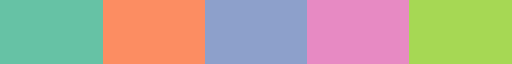

In [12]:
# Create a discrete colormap for plots (not used for correlation matrix)
# Note: in the plotting functions you can either choose a used defined cmap like this one,
# or a normal matplotlib colormap defined by a string (e.g., 'viridis')
colors = np.array([
    [102,194,165],
    [252,141,98],
    [141,160,203],
    [231,138,195],
    [166,216,84]
]) / 255
cell_cmap = sp.create_cmap(color_list = colors)
cell_cmap

### 3.1. Correlation Matrix

In [11]:
# sp.corr_matrix_plot(
#     df=std_cell_stats_df,
#     numerical_features=numerical_features,
#     standardize_data=False,
#     remove_outliers=False,
#     color_map = 'coolwarm',
#     save_dir=save_plots_dir,
#     show=True
# )

### 3.2. PCA plots

In [12]:
# sp.pca_plots(
#     df=std_cell_stats_df,
#     numerical_features=numerical_features[:6],
#     standardize_data=False,
#     remove_outliers=False,
#     color_map = cell_cmap,
#     save_dir=save_plots_dir,
#     show=True
# )

### 3.3. Grid of kdplots for different numerical features

In [65]:
uoms = [
    '\u00B5m' + '\u00B2', 
    '\u00B5m' + '\u00B3', 
    None, 
    None,
    None,
    None,
    '\u00B5m' + '\u00B2'
]

# y_lims = [0.0015, 0.0003, 0.03, 0.7, 9.0, 5, 0.0050]

# sp.features_grid_kdplots(
#     df=numeric_cell_stats_df,
#     features=numerical_features,
#     y_lims=y_lims,
#     remove_outliers=False,
#     units_of_measure=uoms,
#     color_map=cell_cmap,
#     save_dir=save_plots_dir,
#     show=True
# )

### 3.4. Lewis' Law plots

Lewis' law states that the average apical area of cells having $n$ neighbors $\bar{A}_n$ is linearly related to the number of neighbors $n$ itself. $\newline$
In particular we have the following relation:
$$ \frac{\bar{A}_n}{\bar{A}} = \frac{n - 2}{4} $$
In 3D we could have a similar relation for volumes, namely:
$$ \frac{\bar{V}_n}{\bar{V}} \sim n $$


In [14]:
# sp.lewis_law_plots(
#     df=numeric_cell_stats_df,
#     feature='volume',
#     fit_degrees=[1,2],
#     remove_outliers=False,
#     color_map=cell_cmap,
#     save_dir=save_plots_dir,
#     show=True
# )

### 3.5. Violin Plots for individual samples

In [15]:
# features = [
#     'surface_area', 'volume', 'isoperimetric_ratio', 
#     'elongation',
#     'contact_area_fraction', 'mean_contact_area'
# ]
# sp.violin_plots(
#     df=numeric_cell_stats_df, 
#     tissue='0h',
#     features=features,
#     units_of_measure=uoms,
#     remove_outliers=False,
#     color_map='viridis',
#     save_dir=None, 
#     show=True
# )

### 3.6 Statistical analysis

In [14]:
import scipy.stats as stats

# Independent samples t-test of contact area fraction between 0h and 12.5h
tissue_types = ['0.0', '12.5']
data = [cell_stats_df.loc[cell_stats_df['tissue_type'] == t, 'contact_area_fraction'] for t in tissue_types]
statistic, p_value = stats.f_oneway(*data)
print('p-value: ', p_value)
print('statistic: ', statistic)
print('mean: ', [np.mean(d) for d in data])
print('std: ', [np.std(d) for d in data])

p-value:  0.01968967741071509
statistic:  6.930129164996383
mean:  [0.40817532800603445, 0.5868263470658932]
std:  [0.15008608262433698, 0.09855018654792069]


In [26]:
# pairwise t-tests between all time points
import itertools


# Get unique tissue types
tissue_types = cell_stats_df['tissue_type'].unique()

# Perform pairwise statistical comparisons
p_values = []
for tissue_type1, tissue_type2 in itertools.combinations(tissue_types, 2):
    data1 = cell_stats_df.loc[cell_stats_df['tissue_type'] == tissue_type1, 'contact_area_fraction']
    data2 = cell_stats_df.loc[cell_stats_df['tissue_type'] == tissue_type2, 'contact_area_fraction']
    _, p_value = stats.ttest_ind(data1, data2)  # or use appropriate test (e.g., Mann-Whitney U test)
    p_values.append(p_value)

# Apply Bonferroni correction
alpha = 0.05
adjusted_alpha = alpha / len(p_values)
reject_null = [p < adjusted_alpha for p in p_values]

# Interpret the results
pairs = list(itertools.combinations(tissue_types, 2))
for i, (tissue_type1, tissue_type2) in enumerate(pairs):
    p_value = p_values[i]
    reject = reject_null[i]
    if reject:
        print(f"Tissue types: {tissue_type1} vs {tissue_type2} - Significant difference (p-value: {p_value})")
    else:
        print(f"Tissue types: {tissue_type1} vs {tissue_type2} - No significant difference (p-value: {p_value})")


Tissue types: 0.0 vs 3.0 - No significant difference (p-value: 0.5296126134076418)
Tissue types: 0.0 vs 5.0 - No significant difference (p-value: 0.0712847305293238)
Tissue types: 0.0 vs 8.0 - No significant difference (p-value: 0.023085691621998094)
Tissue types: 0.0 vs 12.5 - No significant difference (p-value: 0.01968967741071512)
Tissue types: 3.0 vs 5.0 - No significant difference (p-value: 0.17168042560323116)
Tissue types: 3.0 vs 8.0 - No significant difference (p-value: 0.05195160116445011)
Tissue types: 3.0 vs 12.5 - No significant difference (p-value: 0.04363268163305495)
Tissue types: 5.0 vs 8.0 - No significant difference (p-value: 0.46512981586877045)
Tissue types: 5.0 vs 12.5 - No significant difference (p-value: 0.40815740848046966)
Tissue types: 8.0 vs 12.5 - No significant difference (p-value: 0.9208830783608154)


In [29]:
# compare all time points with 0h

from statsmodels.stats.multitest import multipletests

# Subset the data for the desired columns
subset_df = cell_stats_df[['tissue_type', 'contact_area_fraction']]

# Create an empty list to store the results
results = []

group_0_data = subset_df[subset_df['tissue_type'] == '0.0']['contact_area_fraction']

# Iterate over each group
for group in subset_df['tissue_type'].unique()[1:]:
    # Filter the data for the current group 
    current_group_data = subset_df[subset_df['tissue_type'] == group]['contact_area_fraction']
    
    # Perform the independent t-test
    t_statistic, p_value = stats.ttest_ind(current_group_data, group_0_data)
    
    # Append the results to the list
    results.append((group, p_value))

# Extract the p-values from the results
p_values = [result[1] for result in results]

# Perform p-value adjustment using the Benjamini-Hochberg method
adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Time since Compaction (Hours)': [result[0] for result in results],
    'p-value': p_values,
    'Adjusted p-value': adjusted_p_values
})

print(results_df)


  Time since Compaction (Hours)   p-value  Adjusted p-value
0                           3.0  0.529613          0.529613
1                           5.0  0.071285          0.095046
2                           8.0  0.023086          0.046171
3                          12.5  0.019690          0.046171


In [27]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Subset the data for the desired columns
subset_df = cell_stats_df[['tissue_type', 'contact_area_fraction']]

# Perform the Tukey test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(
    subset_df['contact_area_fraction'],
    subset_df['tissue_type'],
    alpha=0.05
)

print(tukey_results)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0   12.5   0.1787 0.0487  0.0007 0.3566   True
   0.0    3.0   0.0471 0.9399 -0.1308 0.2251  False
   0.0    5.0   0.1333 0.2214 -0.0447 0.3112  False
   0.0    8.0   0.1733 0.0594 -0.0047 0.3513  False
  12.5    3.0  -0.1315 0.2327 -0.3095 0.0464  False
  12.5    5.0  -0.0454 0.9472 -0.2233 0.1326  False
  12.5    8.0  -0.0053    1.0 -0.1833 0.1726  False
   3.0    5.0   0.0861  0.637 -0.0918 0.2641  False
   3.0    8.0   0.1262 0.2695 -0.0518 0.3041  False
   5.0    8.0     0.04 0.9661 -0.1379  0.218  False
---------------------------------------------------


### 3.7. Plots of 2D statistics along standard cartesian axes

#### 3.7.0. Number of 2D neighbors barplots

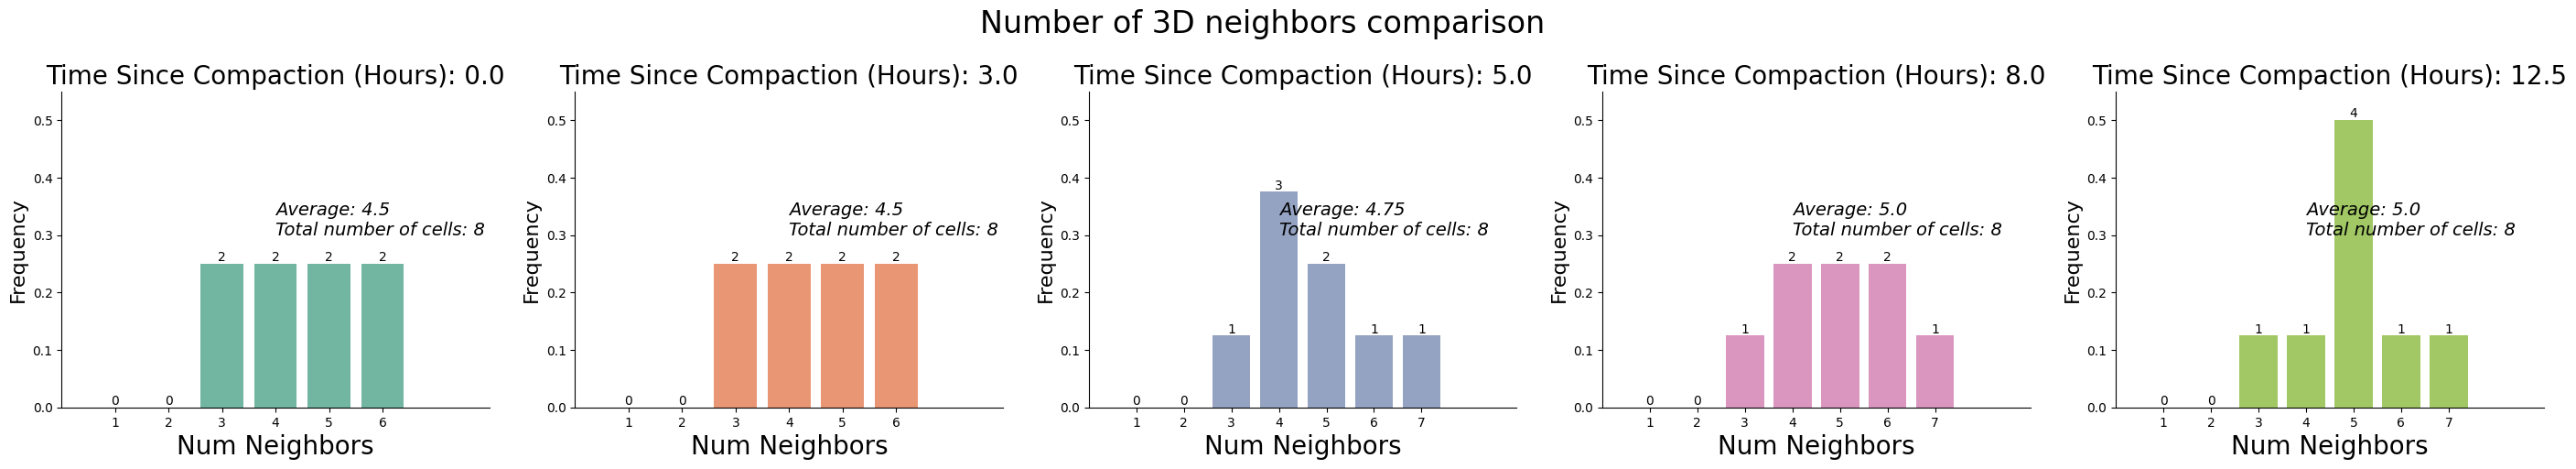

In [16]:
sp.num_neighbors_barplots(
    df=cell_stats_df,
    version='3D',
    remove_outliers=False,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.8. Plots mean and std against time

In [ ]:
# Define the custom order for "tissue_type" (time steps)
custom_order = ['0.0', '3.0', '5.0', '8.0', '12.5']  # Customize this based on your specific data

# Convert "tissue_type" to a categorical variable with the custom order
cell_stats_df['tissue_type'] = pd.Categorical(cell_stats_df['tissue_type'], categories=custom_order, ordered=True)

# Group the data by "tissue_type" and calculate mean and std for each feature
grouped_data = cell_stats_df.groupby('tissue_type')[numerical_features].agg(['mean', 'std'])

# Reset the index to convert the 'tissue_type' group labels to a column
grouped_data = grouped_data.reset_index()

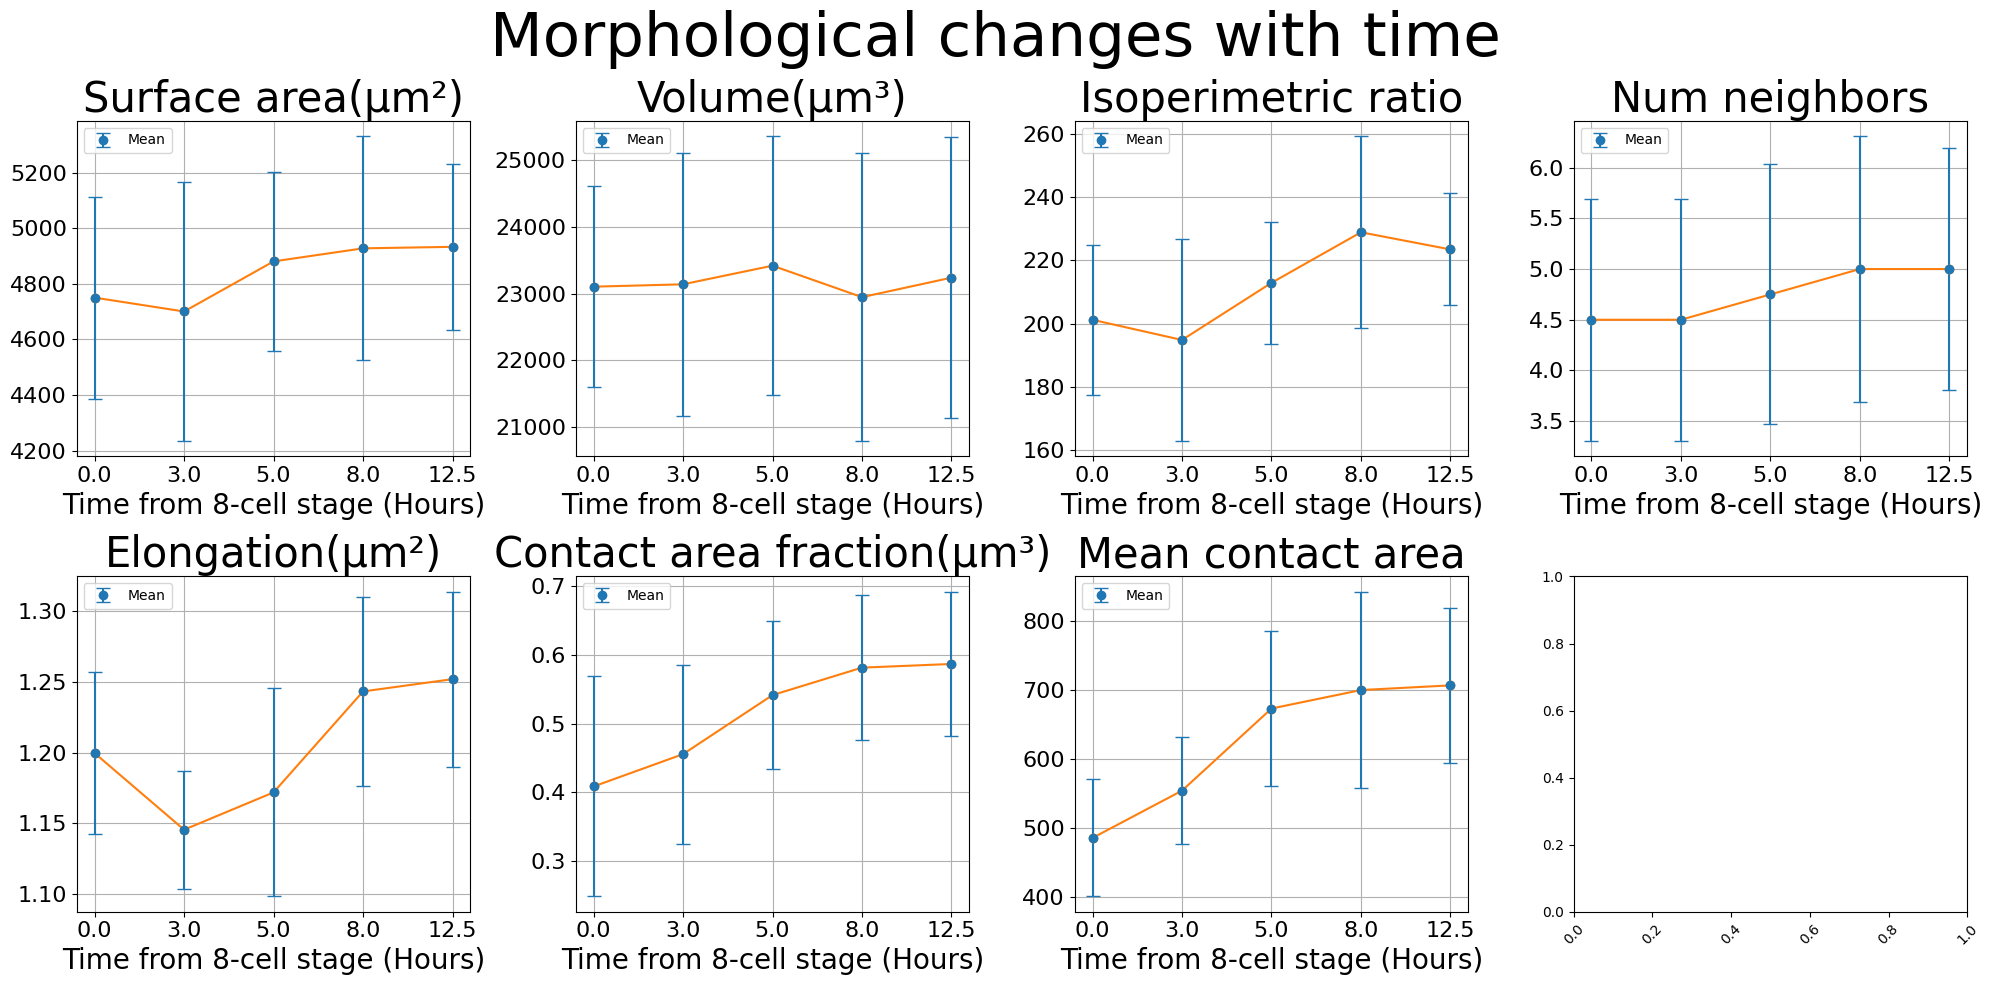

In [74]:
# Create subplots with 4 plots in the first row and 3 in the second
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharey=False)
fig.suptitle("Morphological changes with time", fontsize=44)
# Flatten the axs array to access individual subplots
axs = axs.flatten()

# Plotting mean and standard deviation for each feature in the first row
for i, feature in enumerate(numerical_features[:4]):
    ax = axs[i]
    unit_of_measure = uoms[i]
    # Plotting mean values with lines and error bars
    ax.errorbar(grouped_data['tissue_type'], grouped_data[feature]['mean'],
                yerr=grouped_data[feature]['std'], fmt='o', capsize=5, label='Mean')
    ax.plot(grouped_data['tissue_type'], grouped_data[feature]['mean'], marker='o', linestyle='-')
    
    # Customize the plot
    ax.set_xlabel('Time from 8-cell stage (Hours)', fontsize=20) 
    if unit_of_measure:
        ax.set_title(f'{feature.replace("_", " ").capitalize()}' + f'({unit_of_measure})', fontsize=30)
    else:
        ax.set_title(f'{feature.replace("_", " ").capitalize()}', fontsize=30)
    ax.legend()
    ax.grid(True)
    
    # Set larger font size
    ax.tick_params(axis='both', which='major', labelsize=16)

# Plotting mean and standard deviation for each feature in the second row
for i, feature in enumerate(numerical_features[4:]):
    if i < 3:
        ax = axs[i+4]  # Adjust the index to access the correct subplot
        unit_of_measure = uoms[i]

        # Plotting mean values with lines and error bars
        ax.errorbar(grouped_data['tissue_type'], grouped_data[feature]['mean'],
                    yerr=grouped_data[feature]['std'], fmt='o', capsize=5, label='Mean')
        ax.plot(grouped_data['tissue_type'], grouped_data[feature]['mean'], marker='o', linestyle='-')
        
        # Customize the plot
        ax.set_xlabel('Time from 8-cell stage (Hours)', fontsize=20)
        if unit_of_measure:
            ax.set_title(f'{feature.replace("_", " ").capitalize()}' + f'({unit_of_measure})', fontsize=30)
        else:
            ax.set_title(f'{feature.replace("_", " ").capitalize()}', fontsize=30)
        ax.legend()
        ax.grid(True)
        
        # Set larger font size
        ax.tick_params(axis='both', which='major', labelsize=16)
    else:
        ax.remove()  # Remove the extra subplot in the second row

# Customize x-axis
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [33]:
numerical_features

['surface_area',
 'volume',
 'isoperimetric_ratio',
 'num_neighbors',
 'elongation',
 'contact_area_fraction',
 'mean_contact_area']